In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("spam.csv",encoding='latin-1')

In [4]:
df.head(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN


In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3319,ham,Eh sorry leh... I din c ur msg. Not sad alread...,NaN,NaN,NaN
3400,ham,Thanks honey. Have a great day.,NaN,NaN,NaN
2874,ham,"Idk. You keep saying that you're not, but sinc...",NaN,NaN,NaN
1402,ham,You have registered Sinco as Payee. Log in at ...,NaN,NaN,NaN
410,ham,Come by our room at some point so we can iron ...,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [8]:
# data cleaning
# Eda
# text preprocessing
# model building
# evaluation
# improvement 
# Website

## 1. Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# cdrop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [9]:
df.sample(5)

,v1,v2
390,ham,Huh so late... Fr dinner?
2620,ham,How come?
3064,ham,"Sounds good, keep me posted"
2233,ham,Good Morning plz call me sir
5557,ham,No. I meant the calculation is the same. That ...


In [10]:
#renaming the column name
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [11]:
df.sample(5)

,target,text
4193,ham,Can not use foreign stamps in this country.
4168,ham,Haven't heard anything and he's not answering ...
4538,ham,"Party's at my place at usf, no charge (but if ..."
4117,ham,Watch lor. I saw a few swatch one i thk quite ...
2995,ham,They released vday shirts and when u put it on...


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [14]:
df['target'] = encoder.fit_transform(df['target'])

In [15]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
## missing values 
df.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
# check for duplicated value
df.duplicated().sum()

403

In [18]:
#remove duplicated values
df = df.drop_duplicates(keep='first')

In [19]:
#check again any duplicated value are showing or not
df.duplicated().sum()

0

In [20]:
df.shape

(5169, 2)

## 2. EDA (Explatory Data Analysis)

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

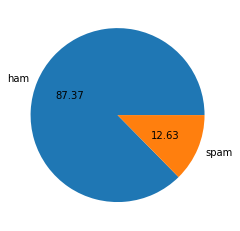

In [23]:
# chart showing
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [28]:
# data is imbalanced


In [24]:
import nltk

In [25]:
!pip install nltk

In [31]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [26]:
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [27]:
df['num_characters'] = df['text'].apply(len)

In [28]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
# number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [30]:
df.head(3)

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37


In [31]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [32]:
df.head(3)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2


In [33]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
# ham 
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
# spam 
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [36]:
## plot histogram
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

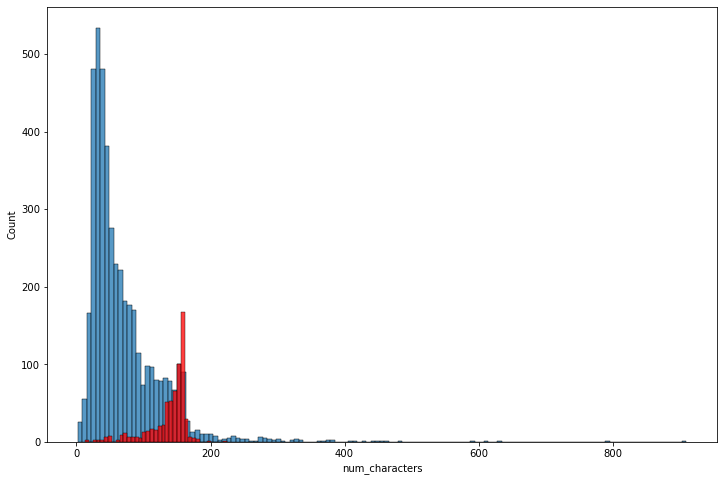

In [37]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]["num_characters"])
sns.histplot(df[df['target'] == 1]["num_characters"],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

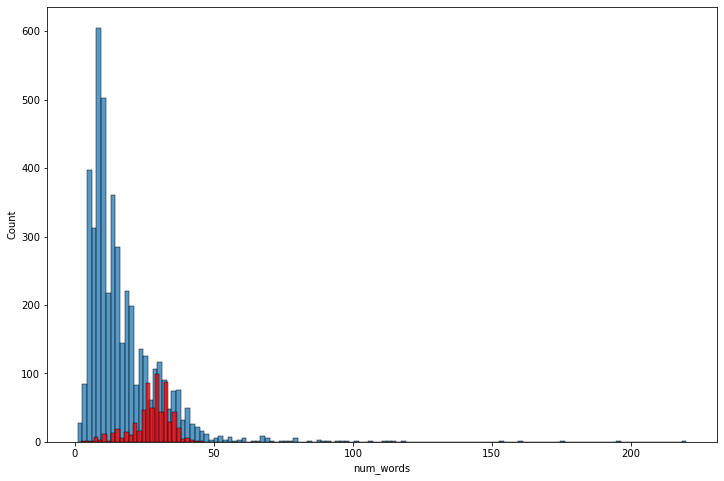

In [38]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]["num_words"])
sns.histplot(df[df['target'] == 1]["num_words"],color='red')

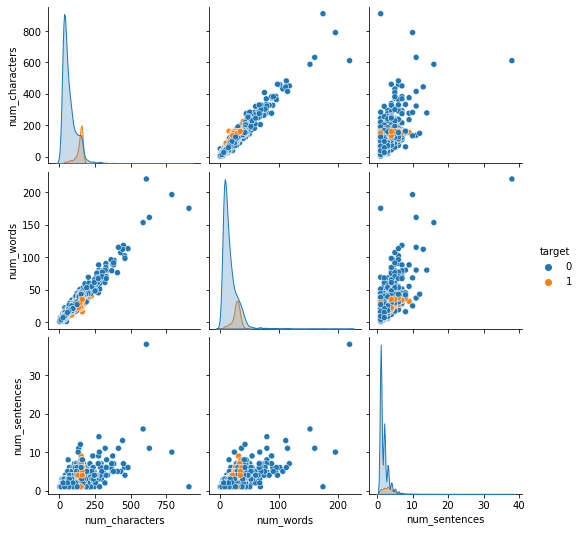

In [39]:
sns.pairplot(df,hue='target')

In [40]:
df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262969,0.267602
num_characters,0.384717,1.000000,0.965784,0.626118
num_words,0.262969,0.965784,1.000000,0.680882
num_sentences,0.267602,0.626118,0.680882,1.000000


<AxesSubplot:>

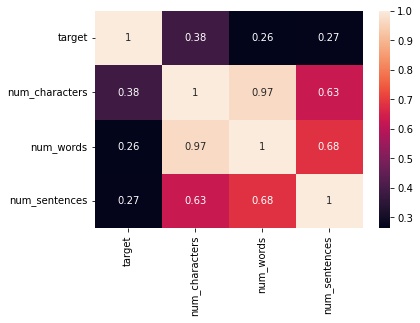

In [41]:
sns.heatmap(df.corr(),annot=True)

## 3. Data Preprocessing
. Lower Case
. Tokenization
. Removing Special Charecter
. Removing stop words and punctuation
. Stemming // Lamitization ["dancing","danced","dance"]

In [66]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    #removing special charecters
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    #removing stopwords & punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
               y.append(i)
    #steaming
    text = y[:]
    y.clear()
    
    for i in text:
            y.append(ps.stem(i))
            
    return " ".join(y)

In [61]:
transform_text("Hi How Are %% You ?")

['hi']

In [62]:
transform_text("Did you like my presentation on ML?")

['like', 'presentation', 'ml']

In [67]:
transform_text("I loved the YT lectures on Machine Learning. How about you?")

'love yt lectur machin learn'

In [44]:
df['text'][100]

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [50]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [51]:
from nltk.corpus import stopwords

In [52]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [55]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [65]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
#like love loving && loved
ps.stem('loving')

'love'

In [ ]:
#creating word cloud
df['text'].apply(transform_text)

In [ ]:
df["transformed_text"] = df["text"].apply(transform_text)

In [ ]:
df.head()